# TICL Pattern Recognition

This notebook exports a raw CLUE hits dataset.

In [2]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
from utils.plotting_utils import plot_event
from utils.matching_utils import split_on_shared_energy, get_eid_splits, get_pairs, get_highest_energy_fraction_simtracksters
%matplotlib widget

file_name = "~/data/photon/new_ntuples_13872546_2.root"
simtracksters_ds = {file_name: "ticlNtuplizer/simtrackstersSC"}
simtracksters = uproot.open(simtracksters_ds)
simtracksters.show(name_width=40)

name                                     | typename                 | interpretation                
-----------------------------------------+--------------------------+-------------------------------
stsSC_event                              | uint32_t                 | AsDtype('>u4')
stsSC_NClusters                          | uint32_t                 | AsDtype('>u4')
stsSC_NTracksters                        | uint32_t                 | AsDtype('>u4')
stsSC_time                               | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
stsSC_timeError                          | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
stsSC_regressed_energy                   | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
stsSC_raw_energy                         | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
stsSC_raw_em_energy                      | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
stsSC_raw_pt                          

## Build hit to trackster dataset

In [13]:
vertices_x = []
vertices_y = []
vertices_z = []
vertices_energy = []
trackster_label = []
trackster_event = []

svx = simtracksters["stsSC_vertices_x"].array()
svy = simtracksters["stsSC_vertices_y"].array()
svz = simtracksters["stsSC_vertices_z"].array()
sve = simtracksters["stsSC_vertices_energy"].array()
svi = simtracksters["stsSC_vertices_indexes"].array()
svm = simtracksters["stsSC_vertices_multiplicity"].array()

for eidx, (evx, evy, evz, eve) in enumerate(zip(svx, svy, svz, sve)):
    ex = []
    ey = []
    ez = []
    ee = []
    el = []
    for ti, (tx, ty, tz, te) in enumerate(zip(evx, evy, evz, eve)):
        ex += list(tx)
        ey += list(ty)
        ez += list(tz)
        ee += list(te)
        el += [ti] * len(tx)
    vertices_x.append(ex)
    vertices_y.append(ey)
    vertices_z.append(ez)
    vertices_energy.append(ee)
    trackster_label.append(el)
    trackster_event.append(eidx)

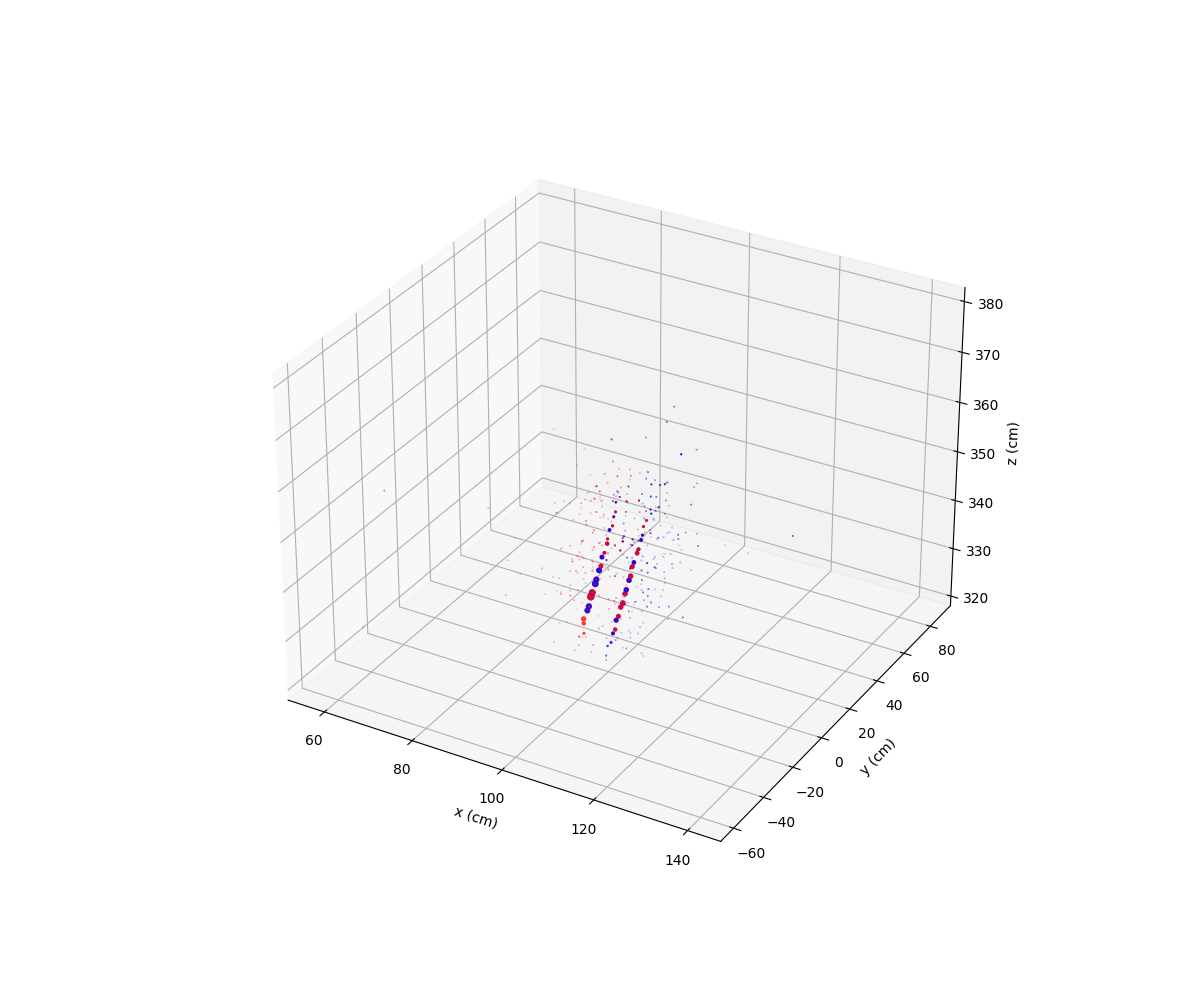

In [14]:
eid = 3

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel("x (cm)")
ax.set_ylabel("y (cm)")
ax.set_zlabel("z (cm)")

c = ["red" if p == 0 else "blue" for p in trackster_label[eid]]

ax.scatter(vertices_x[eid], vertices_y[eid], vertices_z[eid], c=c, s=vertices_energy[eid])

plt.show()

In [7]:
ds = uproot.recreate("data/hits_100e_photon.root")
ds["hits"] = {
    "vertices_x": vertices_x,
    "vertices_y": vertices_y,
    "vertices_z": vertices_z,
    "vertices_energy": vertices_energy,
    "trackster_label": trackster_label,
    "trackster_event": trackster_event,
}
ds.close()